# Prediction using Supervised ML

### Predict the percentage of an student based on the no. of study hours.

In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#reading data
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
s_data=pd.read_csv(url)
print("Data imported successfully")

s_data.head(8)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


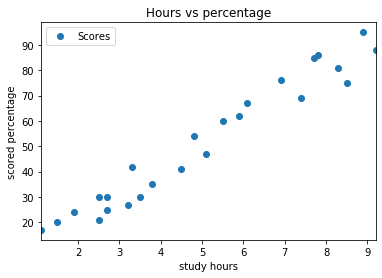

In [6]:
#plotting the distribution of scores
s_data.plot(x='Hours',y='Scores',style='o')
plt.title("Hours vs percentage")
plt.xlabel("study hours")
plt.ylabel("scored percentage")
plt.show()

### From the above graph we can see that there is a positive linear relation between the hours studied and the percentage scored

## Preparing data
#### dividing the data into attributes(inputs) and labels(output)


In [7]:
x=s_data.iloc[:,:-1].values
y=s_data.iloc[:,1].values

#### now by using the train_test_split() method  we will split the data into training and test sets.

In [16]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

## Training our Data


In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


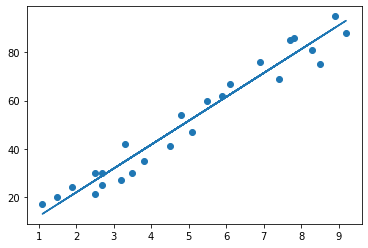

In [18]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [19]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [34]:
# we can also test with our own data

hours = np.array(5).reshape(-1,1)
own_pred = regressor.predict(hours)
own_pred.reshape(-1,1)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[5]]
Predicted Score = 51.57144244464587


### Evaluation of the model 

In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
